In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
car_data = pd.read_csv('Car details v3.csv')

# Display the first few rows of the dataset and its summary information
car_data.head()

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2     12.7@ 2,700(kgm@ rpm)    5.0  
3  22.4 kgm at 1750-2750rpm    5.0  
4     11.5@ 4,500(kgm@ rpm)    5.0

In [2]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [3]:
car_data['name'] = car_data['name'].astype(str).str.split().str[0]
car_data['name'] = car_data['name'].astype('category')


# Extract the numeric part and convert to float

car_data['engine'] = car_data['engine'].astype(str).str.split().str[0]
car_data['engine'] = car_data['engine'].astype(float)

car_data['mileage'] = car_data['mileage'].astype(str).str.split().str[0]
car_data['mileage'] = car_data['mileage'].astype(float)

car_data['max_power'] = car_data['max_power'].astype(str).str.extract('(\d+\.\d+|\d+)').astype(float)

In [4]:
#create 'car_age' feature from 'year' column

import datetime

car_data["car_age"] = (datetime.datetime.now().year) - (car_data["year"])

In [5]:
car_data.drop(["year", "torque"], axis = 1, inplace = True)

In [6]:
car_data.head()

name  selling_price  km_driven    fuel seller_type transmission  \
0   Maruti         450000     145500  Diesel  Individual       Manual   
1    Skoda         370000     120000  Diesel  Individual       Manual   
2    Honda         158000     140000  Petrol  Individual       Manual   
3  Hyundai         225000     127000  Diesel  Individual       Manual   
4   Maruti         130000     120000  Petrol  Individual       Manual   

          owner  mileage  engine  max_power  seats  car_age  
0   First Owner    23.40  1248.0      74.00    5.0       10  
1  Second Owner    21.14  1498.0     103.52    5.0       10  
2   Third Owner    17.70  1497.0      78.00    5.0       18  
3   First Owner    23.00  1396.0      90.00    5.0       14  
4   First Owner    16.10  1298.0      88.20    5.0       17

In [7]:
# check whether there are null values in the dataset
car_data.isnull().sum()

name               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        216
seats            221
car_age            0
dtype: int64

In [8]:
car_data.describe().T

count           mean            std      min        25%  \
selling_price  8128.0  638271.807702  806253.403508  29999.0  254999.00   
km_driven      8128.0   69819.510827   56550.554958      1.0   35000.00   
mileage        7907.0      19.418783       4.037145      0.0      16.78   
engine         7907.0    1458.625016     503.916303    624.0    1197.00   
max_power      7912.0      91.517919      35.822499      0.0      68.05   
seats          7907.0       5.416719       0.959588      2.0       5.00   
car_age        8128.0      10.195989       4.044249      4.0       7.00   

                    50%        75%         max  
selling_price  450000.0  675000.00  10000000.0  
km_driven       60000.0   98000.00   2360457.0  
mileage            19.3      22.32        42.0  
engine           1248.0    1582.00      3604.0  
max_power          82.0     102.00       400.0  
seats               5.0       5.00        14.0  
car_age             9.0      13.00        41.0

In [9]:
#fill null values with median (numeric) and frequent values (categoric)

num_data = [column for column in car_data.select_dtypes(["int", "float"])]
catg_data = [column for column in car_data.select_dtypes(exclude = ["int", "float"])]

for col in num_data:
    car_data[col].fillna(car_data[col].median(), inplace = True)
        
#replace missing values in each categorical column with the most frequent value
for col in catg_data:
    car_data[col].fillna(car_data[col].value_counts().index[0], inplace = True)
    
car_data.isnull().sum()

name             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
car_age          0
dtype: int64

In [10]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   name           8128 non-null   category
 1   selling_price  8128 non-null   int64   
 2   km_driven      8128 non-null   int64   
 3   fuel           8128 non-null   object  
 4   seller_type    8128 non-null   object  
 5   transmission   8128 non-null   object  
 6   owner          8128 non-null   object  
 7   mileage        8128 non-null   float64 
 8   engine         8128 non-null   float64 
 9   max_power      8128 non-null   float64 
 10  seats          8128 non-null   float64 
 11  car_age        8128 non-null   int64   
dtypes: category(1), float64(4), int64(3), object(4)
memory usage: 707.9+ KB


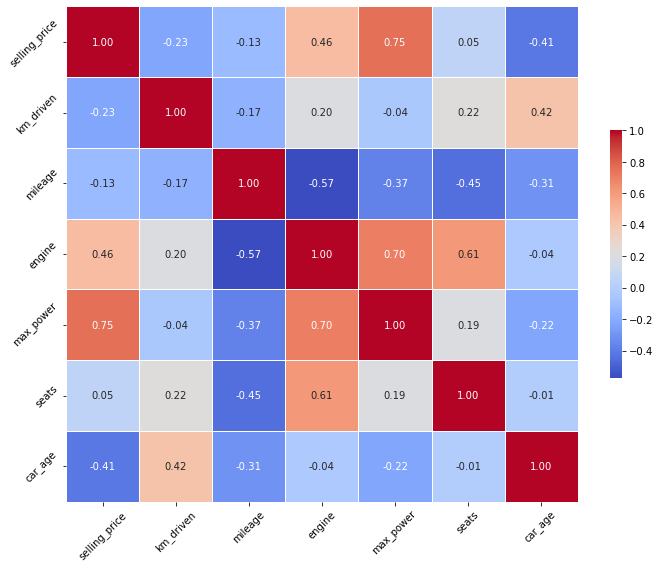

In [11]:
# Compute the correlation matrix
corr = car_data.select_dtypes(include=['float64', 'int64']).corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.5, cbar_kws={"shrink": .5})

# Optional: Adjust the layout
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap

# Show the plot
plt.show()


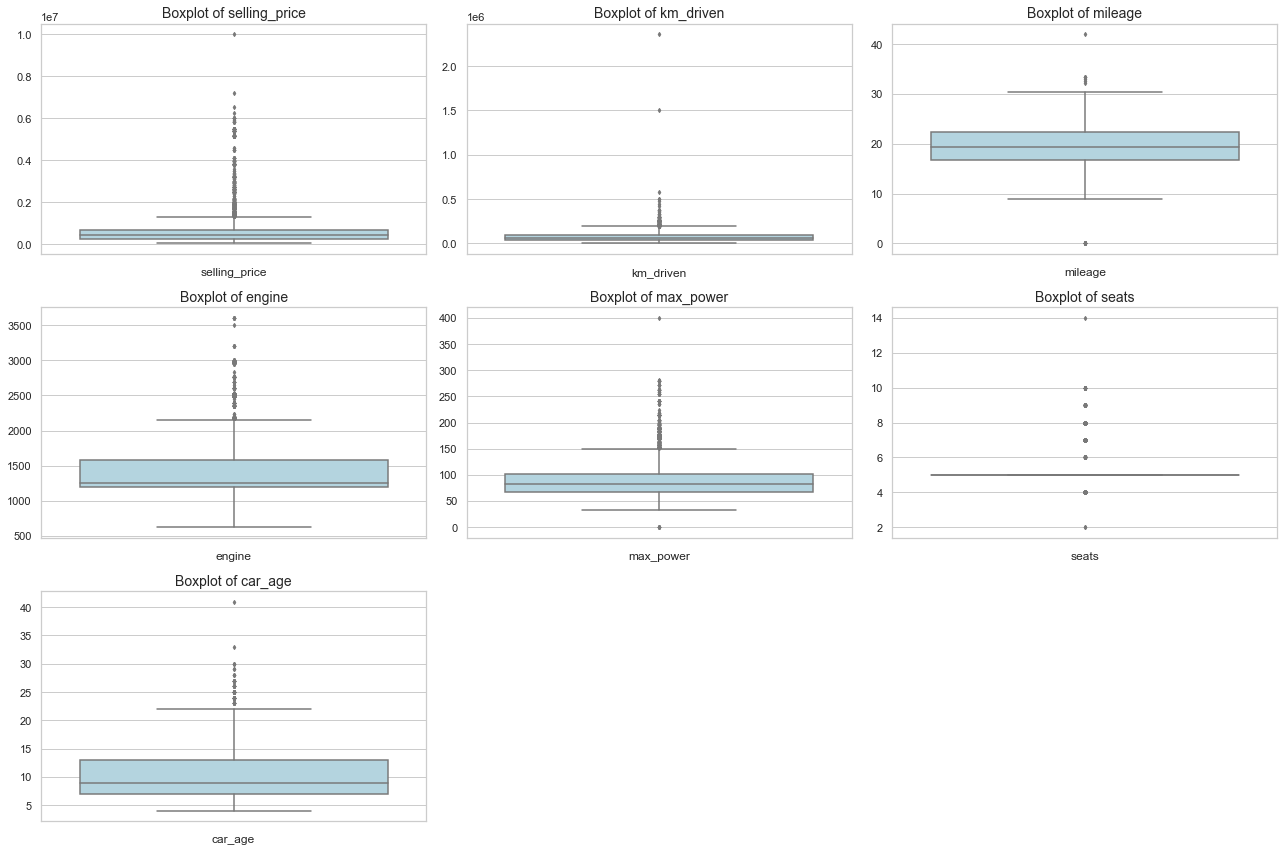

In [12]:
# Set aesthetic parameters in one step
sns.set(style="whitegrid")

# List of variables to plot
variables = ['selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'car_age']

# Setup the matplotlib figure
fig, axes = plt.subplots(3, 3, figsize=(18, 12))  # Adjust the grid layout based on the number of variables
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Create a boxplot for each variable
for i, variable in enumerate(variables):
    sns.boxplot(data=car_data, y=variable, ax=axes[i], color='lightblue', fliersize=3, linewidth=1.5)
    axes[i].set_title(f'Boxplot of {variable}', fontsize=14)
    axes[i].set_xlabel(variable, fontsize=12)
    axes[i].set_ylabel('')  # Remove y-label if it is redundant

# Hide any unused axes if there are any
for ax in axes[len(variables):]:
    ax.set_visible(False)

# Adjust layout to prevent overlap and ensure everything fits
plt.tight_layout()

# Show the plot
plt.show()



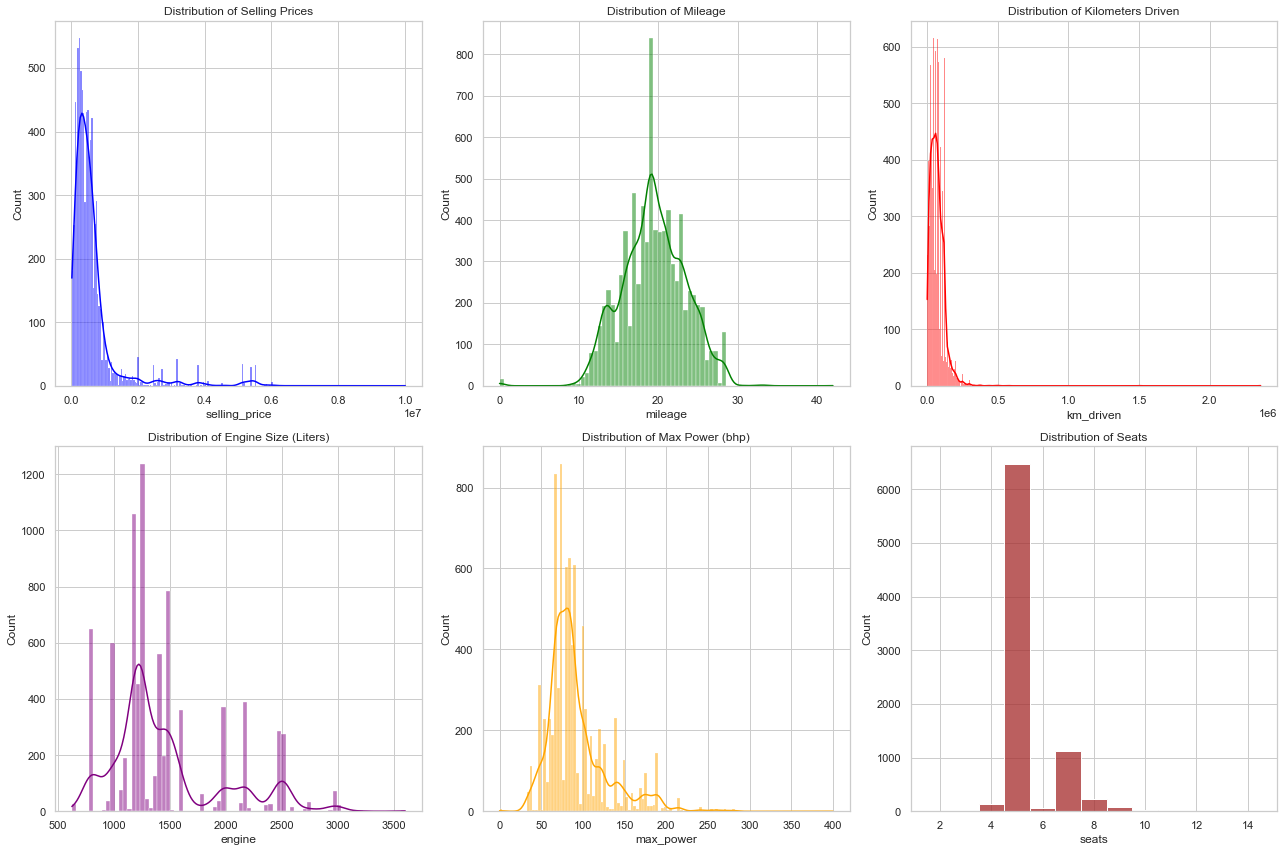

In [13]:
# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Creating subplots for histograms of key features
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plotting the distributions
sns.histplot(data=car_data, x='selling_price', kde=True, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Distribution of Selling Prices')

sns.histplot(data=car_data, x='mileage', kde=True, ax=axes[0, 1], color='green')
axes[0, 1].set_title('Distribution of Mileage')

sns.histplot(data=car_data, x='km_driven', kde=True, ax=axes[0, 2], color='red')
axes[0, 2].set_title('Distribution of Kilometers Driven')

sns.histplot(data=car_data, x='engine', kde=True, ax=axes[1, 0], color='purple')
axes[1, 0].set_title('Distribution of Engine Size (Liters)')

sns.histplot(data=car_data, x='max_power', kde=True, ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Distribution of Max Power (bhp)')

sns.histplot(data=car_data, x='seats', kde=False, discrete=True, ax=axes[1, 2], color='brown')
axes[1, 2].set_title('Distribution of Seats')

plt.tight_layout()
plt.show()


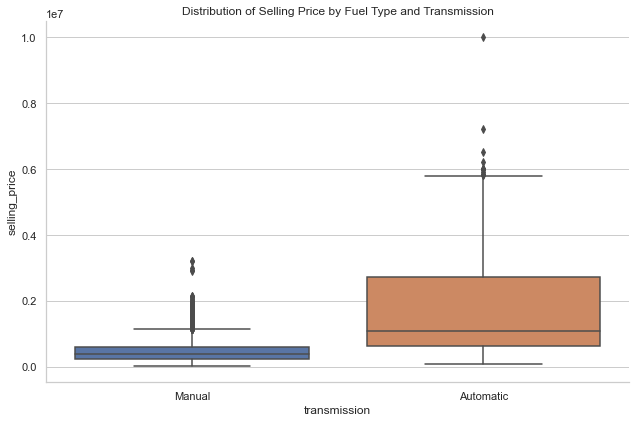

In [14]:
# Create a box plot
sns.catplot(x='transmission', y='selling_price', kind='box', data=car_data, height=6, aspect=1.5)
plt.title('Distribution of Selling Price by Fuel Type and Transmission')
plt.show()

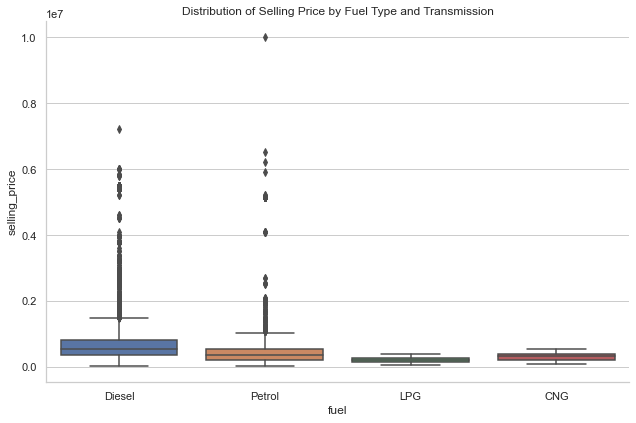

In [15]:
# Create a box plot
sns.catplot(x='fuel', y='selling_price', kind='box', data=car_data, height=6, aspect=1.5)
plt.title('Distribution of Selling Price by Fuel Type and Transmission')
plt.show()

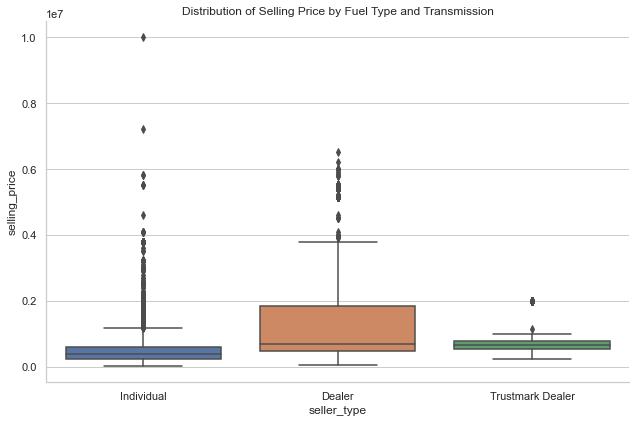

In [16]:
# Create a box plot
sns.catplot(x='seller_type', y='selling_price', kind='box', data=car_data, height=6, aspect=1.5)
plt.title('Distribution of Selling Price by Fuel Type and Transmission')
plt.show()

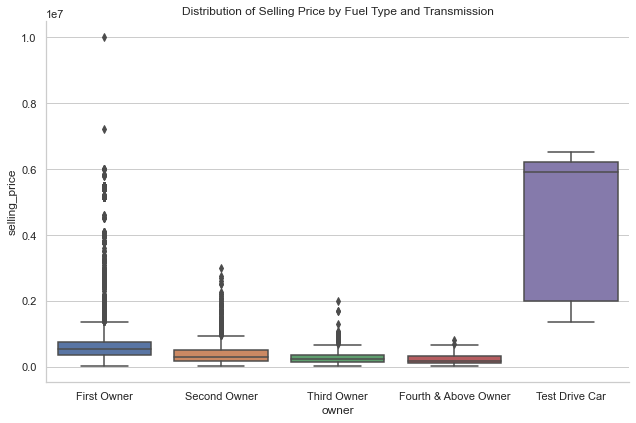

In [17]:
# Create a box plot
sns.catplot(x='owner', y='selling_price', kind='box', data=car_data, height=6, aspect=1.5)
plt.title('Distribution of Selling Price by Fuel Type and Transmission')
plt.show()

In [18]:
# Determine the top 10 most frequent brands
top_brands = car_data['name'].value_counts().nlargest(10).index

# Create a new column that groups all other brands into 'Other'
car_data['brand_name_grouped'] = car_data['name'].apply(lambda x: x if x in top_brands else 'Other')

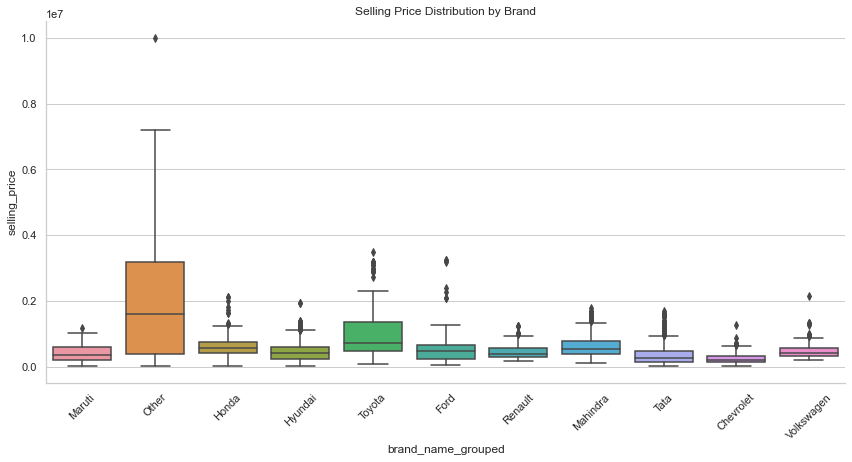

In [19]:
# Create a box plot with Seaborn's catplot
sns.catplot(x='brand_name_grouped', y='selling_price', kind='box', data=car_data, height=6, aspect=2)
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.title('Selling Price Distribution by Brand')
plt.show()

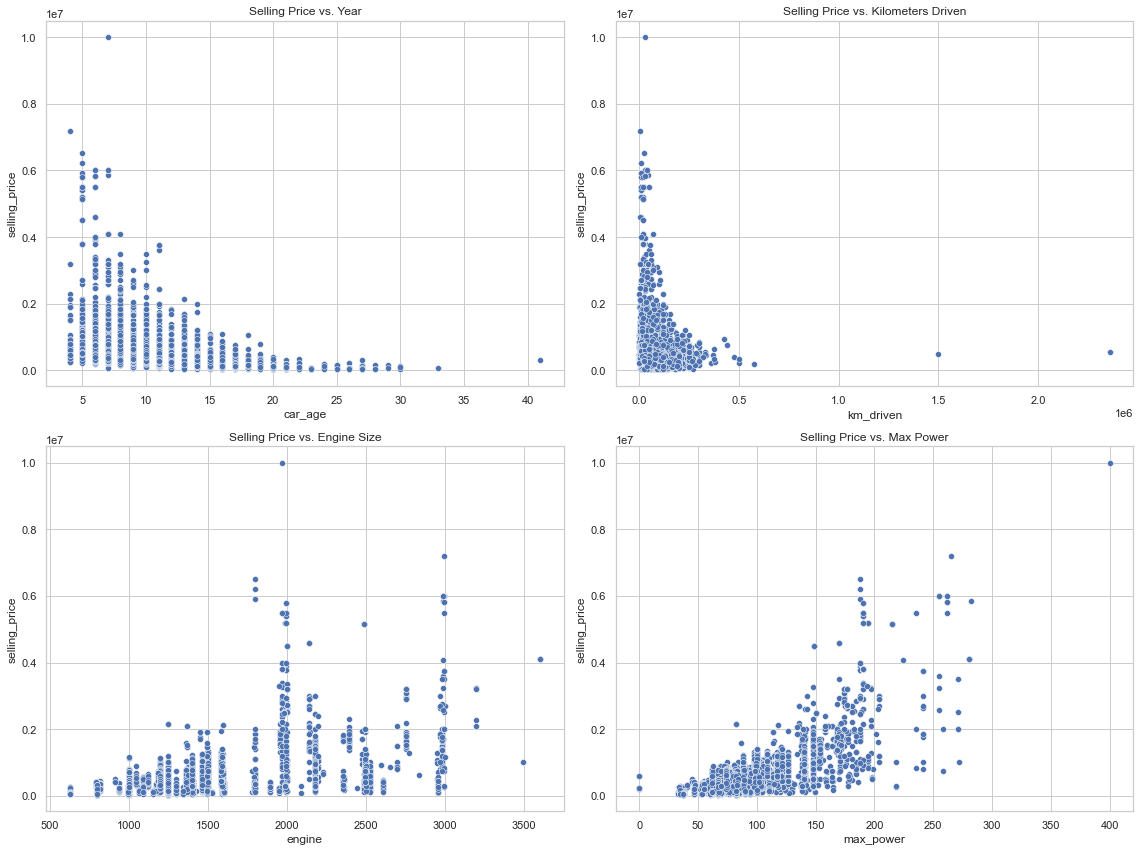

In [20]:
# Creating subplots for scatter plots to examine relationships with selling price
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Relationship between selling price and year
sns.scatterplot(data=car_data, x='car_age', y='selling_price', ax=axes[0, 0])
axes[0, 0].set_title('Selling Price vs. Year')

# Relationship between selling price and kilometers driven
sns.scatterplot(data=car_data, x='km_driven', y='selling_price', ax=axes[0, 1])
axes[0, 1].set_title('Selling Price vs. Kilometers Driven')

# Relationship between selling price and engine size
sns.scatterplot(data=car_data, x='engine', y='selling_price', ax=axes[1, 0])
axes[1, 0].set_title('Selling Price vs. Engine Size')

# Relationship between selling price and max power
sns.scatterplot(data=car_data, x='max_power', y='selling_price', ax=axes[1, 1])
axes[1, 1].set_title('Selling Price vs. Max Power')

plt.tight_layout()
plt.show()

In [21]:
# Select only numeric columns and exclude 'mileage' from the list
numeric_data = [column for column in car_data.select_dtypes(include=["int", "float"]) if column != 'mileage']

# Iterate through the list of numeric columns (excluding 'mileage') to calculate and print skewness
for col in numeric_data:
    print("Skewness of", col, "variable is:", car_data[col].skew())

Skewness of selling_price variable is: 4.193533440675855
Skewness of km_driven variable is: 11.170909783549087
Skewness of engine variable is: 1.1753055440141613
Skewness of max_power variable is: 1.6595575154307947
Skewness of seats variable is: 2.015507247545297
Skewness of car_age variable is: 1.072292893616034


In [22]:
# fix skewness  of them with 'log1p' function

for c in numeric_data:
    car_data[c] = np.log1p(car_data[c])

In [23]:
# get skewness of other numeric variables

numeric_data = [column for column in car_data.select_dtypes(["int", "float"])]
for col in numeric_data:
    print("Skewness of", col, "variable is:", car_data[col].skew())

Skewness of selling_price variable is: 0.22327004522860716
Skewness of km_driven variable is: -1.247395727480728
Skewness of mileage variable is: -0.14220847114521287
Skewness of engine variable is: 0.4462500899554945
Skewness of max_power variable is: -1.0068737857581982
Skewness of seats variable is: 1.6923972129414968
Skewness of car_age variable is: 0.18426408315220322


In [26]:
# select dependent variable (label)

y = car_data["selling_price"]

# select independent variable (estimator)
x = car_data.drop("selling_price", axis = 1)

#encode the variables of the dataset
x = pd.get_dummies(x, drop_first = True)

In [28]:
# Split the dataset into x_train (y_train) and x_test (y_test) sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.20,
                                                    shuffle = True,
                                                    random_state = 1)

In [31]:
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()
rob_scaler.fit(x_train)
x_train = rob_scaler.transform(x_train)
x_test = rob_scaler.transform(x_test)

In [32]:
from sklearn.model_selection import KFold

k_fold = KFold(n_splits = 10, random_state = 11, shuffle = True)

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_log_error

def cv_rmse(model, X, y, k_fold):
    scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=k_fold)
    rmse = np.sqrt(-scores)
    return np.mean(rmse)

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_log_error(y, y_pred))


!conda install -c anaconda xgboost --yes
!conda install -c anaconda mlxtend --yes

from sklearn.linear_model import ElasticNetCV
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from mlxtend.regressor import StackingCVRegressor


xgb = XGBRegressor(n_estimators = 1000, random_state = 1)
gbr = GradientBoostingRegressor(n_estimators = 1000, random_state = 11)
rf = RandomForestRegressor(n_estimators = 1000, random_state = 1)
svr = SVR(C = 20)
# Configure Elastic Net with cross-validation
elastic_net = ElasticNetCV(alphas=[0.01, 0.1, 1, 10, 100], l1_ratio=[0.1, 0.5, 0.9], cv=k_fold, random_state=1)

stacked = StackingCVRegressor(regressors = (xgb, svr, gbr, rf, elastic_net),
                              meta_regressor = gbr, use_features_in_secondary = True)

#fit the stacked model

stacked_model = stacked.fit(np.array(x_train), np.array(y_train))

In [41]:
!which python

/Users/vihaanmotwani/opt/anaconda3/bin/python


In [52]:
from sklearn.linear_model import ElasticNetCV

elastic_net = ElasticNetCV(alphas=[0.01, 0.1, 1, 10, 100], l1_ratio=[0.1, 0.5, 0.9], cv=k_fold, random_state=1)

In [54]:
elastic_net.fit(x_train, y_train)

ElasticNetCV(alphas=[0.01, 0.1, 1, 10, 100],
             cv=KFold(n_splits=10, random_state=11, shuffle=True),
             l1_ratio=[0.1, 0.5, 0.9], random_state=1)

In [55]:
best_alpha = elastic_net.alpha_
best_l1_ratio = elastic_net.l1_ratio_

In [57]:
y_pred = elastic_net.predict(x_test)

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.21546836577735043
Mean Squared Error: 0.08335236162266364
Root Mean Squared Error: 0.28870809067752784
R-squared: 0.8735252746281047


Text(0, 0.5, 'prediction')

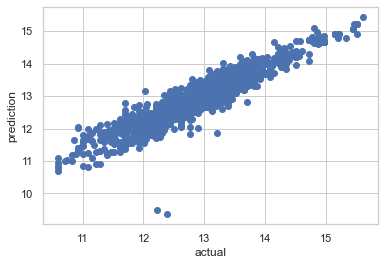

In [59]:
plt.scatter(y_test, y_pred);
plt.xlabel("actual")
plt.ylabel("prediction")

In [60]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators = 1000, random_state = 1)

In [61]:
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=1, ...)

In [62]:
y_pred2 = xgb.predict(x_test)

In [63]:
mae = mean_absolute_error(y_test, y_pred2)
mse = mean_squared_error(y_test, y_pred2)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred2)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.1465009712600689
Mean Squared Error: 0.04826219785310231
Root Mean Squared Error: 0.21968659006207528
R-squared: 0.9267693428178103


Text(0, 0.5, 'prediction')

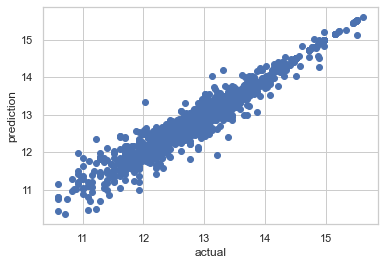

In [64]:
plt.scatter(y_test, y_pred2);
plt.xlabel("actual")
plt.ylabel("prediction")

Mean Absolute Error: 0.1402989398695297
Mean Squared Error: 0.043995065735177856
Root Mean Squared Error: 0.2097500077119852
R-squared: 0.933244076733368


Text(0, 0.5, 'prediction')

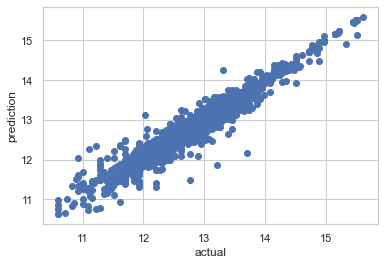

In [65]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 1000, random_state = 1)

rf.fit(x_train, y_train)

y_pred3 = rf.predict(x_test)

mae = mean_absolute_error(y_test, y_pred3)
mse = mean_squared_error(y_test, y_pred3)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred3)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

plt.scatter(y_test, y_pred3);
plt.xlabel("actual")
plt.ylabel("prediction")

Mean Absolute Error: 0.14280675589831884
Mean Squared Error: 0.042051332459832655
Root Mean Squared Error: 0.2050642154541661
R-squared: 0.9361934008725974


Text(0, 0.5, 'prediction')

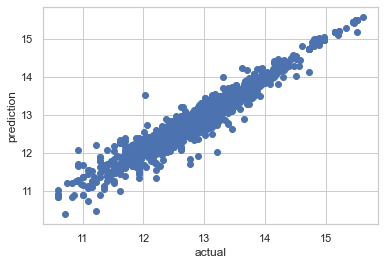

In [66]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators = 1000, random_state = 11)
gbr.fit(x_train, y_train)

y_pred4 = gbr.predict(x_test)

mae = mean_absolute_error(y_test, y_pred4)
mse = mean_squared_error(y_test, y_pred4)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred4)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

plt.scatter(y_test, y_pred4);
plt.xlabel("actual")
plt.ylabel("prediction")